# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

mybtc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_url = btc_url + '?format=json'

In [6]:
#Execute a GET request

#requests.get(btc_url)

btc_response_data = requests.get(btc_url).json()

#response_content = response_data.content
print(btc_response_data)


{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18937250, 'total_supply': 18937250, 'max_supply': 21000000, 'quotes': {'USD': {'price': 35385.0, 'volume_24h': 35116150759, 'market_cap': 666220701468, 'percentage_change_1h': 0.89975300720338, 'percentage_change_24h': -2.55302794241621, 'percentage_change_7d': -18.1408959032678, 'percent_change_1h': 0.89975300720338, 'percent_change_24h': -2.55302794241621, 'percent_change_7d': -18.1408959032678}}, 'last_updated': 1642896834}}, 'metadata': {'timestamp': 1642896834, 'num_cryptocurrencies': 3105, 'error': None}}


In [7]:
import json


In [8]:
#Formatting the JSON

print(json.dumps(btc_response_data, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18937250,
            "total_supply": 18937250,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35385.0,
                    "volume_24h": 35116150759,
                    "market_cap": 666220701468,
                    "percentage_change_1h": 0.89975300720338,
                    "percentage_change_24h": -2.55302794241621,
                    "percentage_change_7d": -18.1408959032678,
                    "percent_change_1h": 0.89975300720338,
                    "percent_change_24h": -2.55302794241621,
                    "percent_change_7d": -18.1408959032678
                }
            },
            "last_updated": 1642896834
        }
    },
    "metadata": {
        "timestamp": 1642896834,
        "num_crypt

In [9]:
# Fetch current BTC price
btc_price = btc_response_data['data']["1"]['quotes']['USD']["price"]

# Display sample data
print('Bitcoin Price:', btc_price)






Bitcoin Price: 35385.0


In [10]:
# Fetch current ETH price
# YOUR CODE HERE!
eth_response_data = requests.get(eth_url).json()


#print(json.dumps(eth_response_data, indent=4))

eth_price = eth_response_data['data']["1027"]['quotes']['USD']["price"]

# Display sample data
#print('Etherium Price:', eth_price)

# Compute current value of my crpto
# YOUR CODE HERE!
current_btc_value = mybtc * btc_price
current_eth_value = my_eth * eth_price
total_crypto_value = current_btc_value + current_eth_value

total_crypto_value


# Print current crypto wallet balance
print(f"The current value of your {mybtc} BTC is ${current_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${current_eth_value:0.2f}")

print(f'Total Value of Crypto Assets: ${total_crypto_value:0.2f}')

The current value of your 1.2 BTC is $42462.00
The current value of your 5.3 ETH is $12888.70
Total Value of Crypto Assets: $55350.70


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")



Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [13]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
start = pd.Timestamp("2017-01-21", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()



df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio_year.head()


AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-01 00:00:00-05:00  107.75  107.8250  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.3450  107.10  107.200  4266243.0   
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-02-01 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871.0  
2018-02-05 00:00:00-05:00  273.47  275.85  263.31  264.18  205971586.0  
2018-02-06 00:00:00-05:00  259.99  269.70  254.12  269.18  232359323.0  
2018-02-07 00:00:00-05:00  268.50  272.36  267.63  267.66  112819262.0

In [15]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df
# Print AGG and SPY close prices
#df_portfolio_year.head(10)

df_closing_prices = pd.DataFrame()


df_closing_prices["AGG"] = df_portfolio_year["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_year["SPY"]["close"]

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices.tail(10)

#print(f"Current AGG closing price: ${agg_close_price}")
#print(f"Current SPY closing price: ${spy_close_price}")

,AGG,SPY
2022-01-07,112.50,466.12
2022-01-10,112.41,465.56
2022-01-11,112.61,469.74
2022-01-12,112.60,471.06
2022-01-13,112.80,464.54
2022-01-14,112.17,464.68
2022-01-18,111.49,456.53
2022-01-19,111.71,451.79
2022-01-20,111.79,446.79
2022-01-21,112.24,438.11


In [16]:
agg_close = df_portfolio_year['AGG']['close']['2022-01-21']
spy_close = df_portfolio_year['SPY']['close']['2022-01-21']                          

print(f'Current AGG closing price: ${agg_close}')
print(f'Current SPY closing price: ${spy_close}')


Current AGG closing price: $112.24
Current SPY closing price: $438.11


In [17]:
my_agg_value = my_agg * agg_close
my_spy_value = my_spy * spy_close
total_stock_value =my_agg_value + my_spy_value

total_stock_value


# Print current crypto wallet balance
print(f"The current value of your {my_agg} AGG is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY is ${my_spy_value:0.2f}")

print(f'Total Value of Stock Shares: ${total_stock_value:0.2f}')

The current value of your 200 AGG is $22448.00
The current value of your 50 SPY is $21905.50
Total Value of Stock Shares: $44353.50


In [18]:
# Compute the current value of shares
# YOUR CODE HERE!

# Print current value of shares
#print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
#print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

### Savings Health Analysis

In [19]:
# Set monthly household income
# YOUR CODE HERE!
monthly = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
df_savings_data = [total_crypto_value,  total_stock_value] 

#[current_btc_value + current_eth_value + my_agg_value + my_spy_value]
#column = ['Amount']
#rows = ['Crypto', 'Shares']

df_savings = pd.DataFrame(df_savings_data, columns=['Amount'], index = ['Crypto', 'Shares'])

display(df_savings)

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
#display(df_savings)

,Amount
Crypto,55350.699
Shares,44353.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

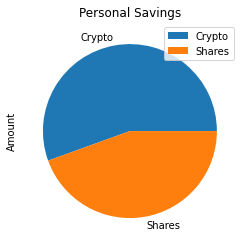

In [20]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='Amount', title = 'Personal Savings')


In [21]:
# Set ideal emergency fund
emergency_fund = monthly * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print(f'You have enough saved!')
elif total_savings == emergency_fund:
    print(f'You have reached your goal!')
else:
    print(f'You are {emergancy_fund - total_savings} short of your goal!!')

# YOUR CODE HERE!

You have enough saved!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
#spacer cell


In [23]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [24]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [25]:
today = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()
tickers = ["AGG", "SPY"]
timeframe = "1D"

# Set start and end dates of five years back from today.

# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-21', tz='America/New_York').isoformat()

monte_carlo_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

# Display sample data
monte_carlo_df

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2018-02-02 00:00:00-05:00  107.25  107.3450  107.10  107.200  4266243  280.08   
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995  273.47   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931  259.99   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626  268.50   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275  267.97   
...                           ...       ...     ...      ...      ...     ...   
2022-01-14 00:00:00-05:00  112.53  112.5450  112.15  112.170  8341976  461.19   
2022-01-18 00:00:00-05:00  111.81  111.8600  111.47  111.490  7390142  459.73   
2022-01-19 00:00:00-05:00  111.70  111.8900  111.65  111.710  7641972  458.17   
2022-01-20 00:00:00-05:00  111.84  111.9000  111.75  111.790  6861797  453.75   
2022-01-21 00:00:00-05:00  112.19  112.3500  112.11  112.240  7789076  445.56   

                                                                
                               high     low   close     volume  
time                                                            
2018-02-02 00:00:00-05:00  280.2300  275.41  275.52  121717871  
2018-02-05 00:00:00-05:00  275.8500  263.31  264.18  205971586  
2018-02-06 00:00:00-05:00  269.7000  254.12  269.18  232359323  
2018-02-07 00:00:00-05:00  272.3600  267.63  267.66  112819262  
2018-02-08 00:00:00-05:00  268.1700  257.59  257.72  156654099  
...                             ...     ...     ...        ...  
2022-01-14 00:00:00-05:00  465.0900  459.90  464.68   84172573  
2022-01-18 00:00:00-05:00  459.9600  455.31  456.53   95565773  
2022-01-19 00:00:00-05:00  459.6124  451.46  451.79   95311817  
2022-01-20 00:00:00-05:00  458.7400  444.50  446.79  105009751  
2022-01-21 00:00:00-05:00  448.0600  437.97  438.11  174541931  

[1000 rows x 10 columns]

In [27]:
#weights = [.4, .6]

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = monte_carlo_df,
    weights = [.40, .60],
    num_simulation = 1000,
    num_trading_days = 252*30
)


MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2018-02-02 00:00:00-05:00  107.25  107.3450  107.10  107.200  4266243   
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-02 00:00:00-05:00          NaN  280.08  280.23  275.41  275.52   
2018-02-05 00:00:00-05:00     0.004011  273.47  275.85  263.31  264.18   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.70  254.12  269.18   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   
2018-02-08 00:00:00-05:00    -0.001541  267.97  268.17  257.59  257.72   

                                                   
                              volume daily_return  
time                                               
2018-02-02 00:00:00-05:00  121717871          NaN  
2018-02-05 00:00:00-05:00  205971586    -0.041159  
2018-02-06 00:00:00-05:00  232359323     0.018926  
2018-02-07 00:00:00-05:00  112819262    -0.005647  
2018-02-08 00:00:00-05:00  156654099    -0.037137

In [29]:
# Printing the simulation input data
# YOUR CODE HERE!

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Fintech\Desktop\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988443,1.005543,0.972400,1.013395,1.002598,1.005681,1.010732,1.014003,1.019051,1.004673,...,0.999471,1.005548,0.991415,1.013464,0.996657,0.993384,1.020362,1.009053,0.997685,1.012859
2,0.977950,1.000549,0.965743,1.022825,1.011168,0.997663,1.021881,1.020778,1.024205,1.007689,...,0.994863,1.001257,0.997305,1.003673,0.980731,1.002556,1.017654,1.020759,0.998113,1.008504
3,0.966786,0.995809,0.960534,1.012291,1.014783,1.013024,1.022293,1.028595,1.028973,0.999056,...,0.993517,1.003432,1.005258,1.010648,0.986353,1.008028,1.011288,1.032906,0.982608,1.016203
4,0.981706,0.997370,0.947654,1.024162,1.025338,1.002118,1.002422,1.026205,1.026226,0.993818,...,0.994443,0.997993,0.999918,1.007373,0.987367,1.018293,1.017889,1.021244,0.990265,1.022792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.515266,10.979530,11.238691,24.958055,12.445400,7.851200,7.841543,14.030242,29.031897,11.983398,...,16.729947,13.059948,14.196250,8.768076,51.947384,4.526524,4.429853,12.824052,11.078032,5.535150
7557,18.484770,11.078527,11.178581,24.785624,12.473925,7.763972,7.845081,13.797962,29.015466,11.932887,...,16.859224,13.026865,14.164072,8.742470,52.017902,4.487365,4.442624,12.922312,10.938011,5.574142
7558,18.345918,10.932334,11.234300,24.910925,12.498681,7.767128,7.885840,13.785757,29.094225,11.825311,...,16.818677,13.071672,14.278057,8.673451,52.448671,4.549201,4.449151,13.009467,10.933971,5.582720
7559,18.382941,10.761077,11.269840,25.270982,12.436738,7.930155,7.957843,13.890411,29.207759,11.664517,...,16.986646,13.077144,14.179167,8.695612,52.031686,4.632642,4.396798,13.123355,10.919355,5.625776


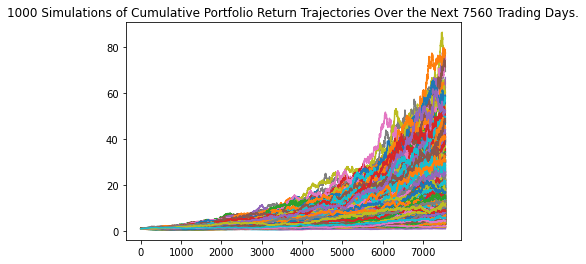

In [31]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

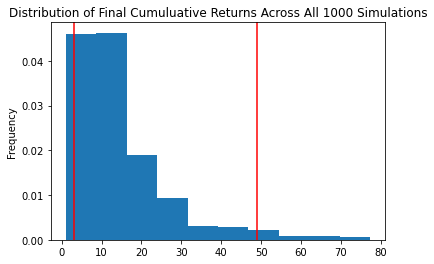

In [32]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           1000.000000
mean              14.778802
std               11.909195
min                1.026206
25%                6.968188
50%               11.543260
75%               18.251994
max               77.317586
95% CI Lower       2.972701
95% CI Upper      49.038650
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59454.02 and $980773.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89181.02 and $1471159.5


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [38]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [39]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [41]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")